Imports


In [2]:
from collections import defaultdict
import math

Tree print function

In [3]:
def print_tree(node, level=0, prefix="Root: "):
    if node is not None:
        print("  " * level + prefix + str(node.value)+", "+ str(node.count))
        for children in node.children:
            print_tree(children, level + 1, "Children: ")

Tree definition 

In [27]:

class Node:
    def __init__(self, value,count):
        self.value = value
        self.count = count
        self.children = []

    def add_children(self, children):
        self.children.append(children)







root = Node(1,2)
nodo2 = Node(2,3)
node4= Node(4,4)
node6=Node(7,0)
node7=Node(9,5)
node12=Node(10,2)
nodo13= Node(6,9)
nodo14= Node(9,3)
nodo15= Node(10,0)

root.add_children(nodo2)
nodo2.add_children(node4)
node4.add_children(node6)
node4.add_children(node7)
node4.add_children(node12)
root.add_children(nodo14)
nodo14.add_children(nodo15)
print_tree(root)



Root: 1, 2
  Children: 2, 3
    Children: 4, 4
      Children: 7, 0
      Children: 9, 5
      Children: 10, 2
  Children: 9, 3
    Children: 10, 0


Selection

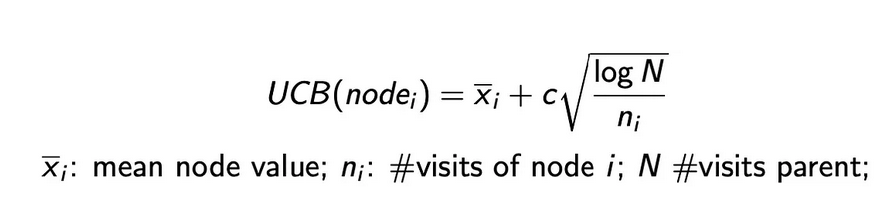

In [32]:
def selection(node):
    children_data = []
    max_node = None
    epsilon=0.000000001
    max_UCB = float('-inf')
    parent_count = node.count
    c_alpha=1
    if node.children:
        for child in node.children:
            child_value = child.value
            child_count = child.count

            if child_count == 0:
                child_UCB= child_value + c_alpha * math.sqrt(math.log(parent_count) / epsilon)
            else:
                child_UCB=child_value + c_alpha * math.sqrt(math.log(parent_count) / child_count)
            print(child_UCB)
            children_data.append((child_value, child_count, child))
            
            if child_UCB > max_UCB:
                max_UCB = child_UCB
                max_node = child
        selection(max_node)
    else:
        print(f"This state is a leaf: {str(node.value)}, {str(node.count)}")
        return node
    return children_data, max_node




specific_node = root  
children_data, max_node = upper_confidence_bound(specific_node)

if max_node is not None:
    print(f"Node with Maximum Value: Value: {max_node.value}, Count: {max_node.count}, {max_node}")
else:
    print("No children nodes to find maximum value.")

2.480675628866961
9.480675628866962
33155.32076580508
This state is a leaf: 10, 0
Node with Maximum Value: Value: 9, Count: 3, <__main__.Node object at 0x0000020849F44B90>


In [6]:
def child_ucb(child_value, parent_count, child_count, c_alpha, epsilon=0.0001):
  if child_count == 0:
    return child_value + c_alpha * math.sqrt(math.log(parent_count) / epsilon)
  else:
    return child_value + c_alpha * math.sqrt(math.log(parent_count) / child_count)


Expansion


Simulation


Backup
